<a href="https://colab.research.google.com/github/Sami-1203/ACMBMU_Hacktoberfest/blob/main/CarDekho_Samiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="nandinichaturvedi"
os.environ['KAGGLE_KEY'] = "d5322bd88a80a577c5d9dad50799a172"
!kaggle datasets download -d manishkr1754/cardekho-used-car-data
!unzip cardekho-used-car-data.zip

401 - Unauthorized
unzip:  cannot find or open cardekho-used-car-data.zip, cardekho-used-car-data.zip.zip or cardekho-used-car-data.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
CarDekho_data = pd.read_csv('cardekho_dataset.csv')

In [ ]:
CarDekho_data.shape  #number of rows and columns in the dataset

(15411, 14)

In [ ]:
CarDekho_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
CarDekho_data.drop(['Unnamed: 0','car_name','seller_type','seats'], axis=1, inplace=True)

In [ ]:
CarDekho_data.rename(columns={'max_power': 'hp'}, inplace=True)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
CarDekho_data.head(10)

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,hp,selling_price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,46.30,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,82.00,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,80.00,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,67.10,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,98.59,570000
5,Maruti,Wagon R,8,35000,Petrol,Manual,18.90,998,67.10,350000
6,Hyundai,i10,8,40000,Petrol,Manual,20.36,1197,78.90,315000
7,Maruti,Wagon R,3,17512,Petrol,Manual,20.51,998,67.04,410000
8,Hyundai,Venue,2,20000,Petrol,Automatic,18.15,998,118.35,1050000
9,Maruti,Swift,4,28321,Petrol,Manual,16.60,1197,85.00,511000


In [ ]:
CarDekho_data.shape

(15411, 10)

In [ ]:
CarDekho_data.rename(columns={'selling_price': 'price'}, inplace=True)
#CarDekho_data['price'] = (CarDekho_data['price']) /100000


In [ ]:
CarDekho_data.describe()

,vehicle_age,km_driven,mileage,engine,hp,price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,6.04,55616.48,19.70,1486.06,100.59,774971.12
std,3.01,51618.55,4.17,521.11,42.97,894128.36
min,0.00,100.00,4.00,793.00,38.40,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,556000.00
75%,8.00,70000.00,22.70,1582.00,117.30,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,39500000.00


In [ ]:
CarDekho_data[CarDekho_data['vehicle_age']==0]

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,hp,price
5078,Maruti,Ignis,0,5000,Petrol,Manual,20.89,1197,81.80,550000
7789,Mahindra,KUV,0,30000,Petrol,Manual,18.15,1198,82.00,400000
10315,BMW,5,0,2000,Diesel,Automatic,22.48,1995,187.74,4850000
11486,BMW,5,0,2000,Diesel,Automatic,22.48,1995,187.74,4850000
12157,Maruti,S-Presso,0,5000,Petrol,Manual,21.70,998,67.00,500000


In [ ]:
CarDekho_data.tail(10)

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,hp,price
15401,Maruti,Swift,3,25000,Petrol,Automatic,22.00,1197,81.80,590000
15402,Honda,Amaze,6,28000,Diesel,Manual,25.80,1498,98.60,525000
15403,Renault,KWID,2,2700,Petrol,Manual,25.17,799,53.30,395000
15404,Maruti,Ertiga,5,56829,Diesel,Manual,20.77,1248,88.80,895000
15405,Hyundai,Grand,5,9229,Petrol,Manual,18.90,1197,82.00,545000
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,68.05,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,91.10,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,103.52,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,140.00,1225000
15410,Honda,City,2,13000,Petrol,Automatic,18.00,1497,117.60,1200000


=> **MISSING VALUES IN THE DATASET **

In [ ]:
#FINDING MISSING VALUES IN THE DATASET
CarDekho_data.isnull().sum()


brand                0
model                0
vehicle_age          0
km_driven            0
fuel_type            0
transmission_type    0
mileage              0
engine               0
hp                   0
price                0
dtype: int64

In [ ]:
#NOT Required
num_cols = ['price','engine','mileage','km_driven','hp']
fe_cols = ['fuel_type','transmission_type','brand','model']

CarDekho_data[num_cols] = CarDekho_data[num_cols].replace(0, np.nan, regex=False)
CarDekho_data[fe_cols] = CarDekho_data[fe_cols].replace({"–": np.nan})


In [ ]:
CarDekho_data['price_zscore'] = (CarDekho_data['price'] - CarDekho_data['price'].median()) / CarDekho_data['price'].std()

outlier_upp = CarDekho_data[CarDekho_data['price_zscore']>3]
outlier_low = CarDekho_data[CarDekho_data['price_zscore']<-3]

print("# lower Outliers",outlier_low.shape)
print("# upper Outliers",outlier_upp.shape)

# lower Outliers (0, 11)
# upper Outliers (345, 11)


In [ ]:
CarDekho_data.shape
CarDekho_data.drop(CarDekho_data[(CarDekho_data['price_zscore'] >3)].index, inplace=True)
CarDekho_data.drop(columns=['price_zscore'], axis=1, inplace=True)
CarDekho_data.shape

(15066, 10)

In [ ]:
# rerun step 5
from scipy.stats import zscore

# Assuming data is your DataFrame
usedcars_filtered = CarDekho_data

# Group rows by 'make' and 'model'

grouped_models = usedcars_filtered.groupby(['brand', 'model'])

# Define a function to calculate z-scores within each group
def calculate_zscores(group):
    group['cc-zscore'] = zscore(group['engine'])
    return group

# Apply the function to each group and concatenate the results
result = grouped_models.apply(calculate_zscores)
u_cc_outlier = result[result['cc-zscore']>3]
l_cc_outlier = result[result['cc-zscore']<-3]

# Display the resulting DataFrame
#print(result)
print(u_cc_outlier.count())
print('************ Lower outliers ***********************')
print(l_cc_outlier.count())

brand                63
model                63
vehicle_age          63
km_driven            63
fuel_type            63
transmission_type    63
mileage              63
engine               63
hp                   63
price                63
cc-zscore            63
dtype: int64
************ Lower outliers ***********************
brand                76
model                76
vehicle_age          76
km_driven            76
fuel_type            76
transmission_type    76
mileage              76
engine               76
hp                   76
price                76
cc-zscore            76
dtype: int64


In [ ]:
# Drop 'cc-outliers' model-wise -rerun step 6

usedcars_filtered.drop(usedcars_filtered[(result['cc-zscore'] < -3) | (result['cc-zscore'] > 3)].index, inplace=True)

CarDekho_data = usedcars_filtered

In [ ]:
CarDekho_data.shape

(14927, 10)

In [ ]:
CarDekho_data.describe()

,vehicle_age,km_driven,mileage,engine,hp,price
count,14927.00,14927.00,14927.00,14927.00,14927.00,14927.00
mean,6.08,56219.00,19.81,1458.77,97.27,677350.56
std,3.01,52080.86,4.12,482.07,36.46,485964.13
min,0.00,100.00,7.94,796.00,38.40,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,380000.00
50%,6.00,50000.00,19.70,1248.00,88.50,550000.00
75%,8.00,71000.00,22.70,1582.00,110.00,795000.00
max,29.00,3800000.00,33.54,4806.00,500.00,3200000.00


In [ ]:
correlation_matrix = CarDekho_data.corr()

# Select correlations of 'Price' with other attributes
price_correlation = correlation_matrix['price']

# Create a DataFrame for the correlation values
correlation_table = pd.DataFrame({'Attribute': price_correlation.index, 'Correlation with Price': price_correlation.values})

# Sort the table by absolute correlation values
correlation_table['Abs Correlation'] = correlation_table['Correlation with Price'].abs()
correlation_table = correlation_table.sort_values(by='Abs Correlation', ascending=False)

# Display the correlation table
print(correlation_table)

     Attribute  Correlation with Price  Abs Correlation
5        price                    1.00             1.00
4           hp                    0.76             0.76
3       engine                    0.64             0.64
2      mileage                   -0.34             0.34
0  vehicle_age                   -0.32             0.32
1    km_driven                   -0.04             0.04


5) ARE THERE ANY NOTABLE PERFORMANCE DIFFERENCES BETWEEN PETROL AND DIESEL CARS IN TERMS OF MILEAGE AND PRICE?

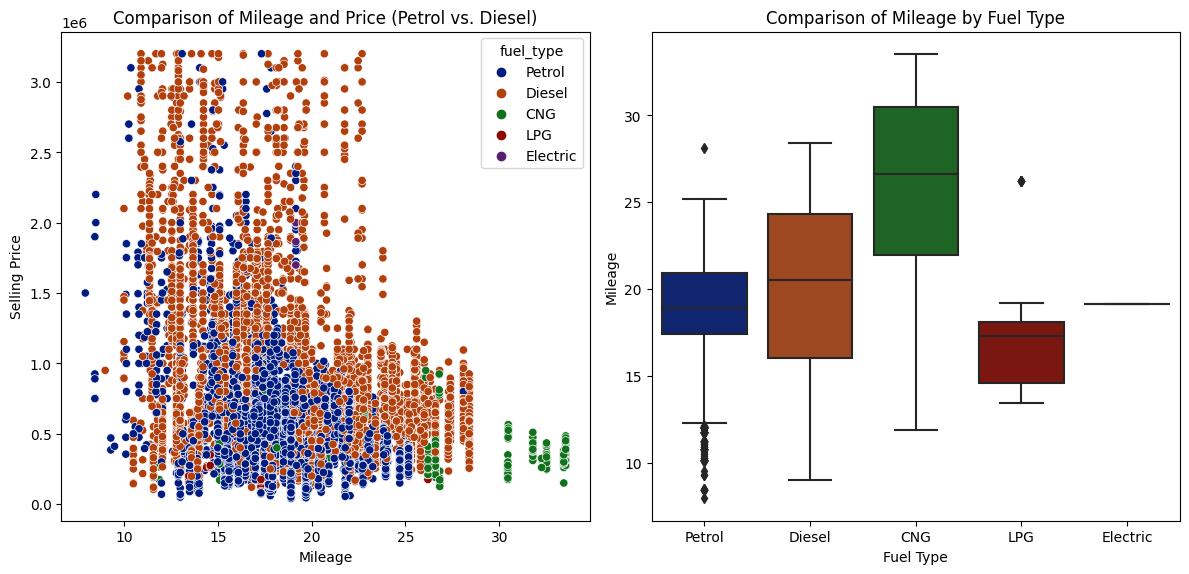

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=CarDekho_data, x='mileage', y='price', hue='fuel_type', palette='dark')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Comparison of Mileage and Price (Petrol vs. Diesel)')

plt.subplot(1, 2, 2)
sns.boxplot(data=CarDekho_data, x='fuel_type', y='mileage', palette='dark')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.title('Comparison of Mileage by Fuel Type')

plt.tight_layout()
plt.show()


Mileage and Price Comparison (Scatter Plot):
The scatter plot in the first subplot allows you to visually compare both mileage and price for both petrol and diesel cars.
observations:
petrol cars generally have a wider range of mileage values, suggesting a larger variety in fuel efficiency within the petrol category.
Diesel cars, on average, tend to have slightly higher mileage compared to petrol cars.
The price range for diesel cars is spread over a wider range compared to petrol cars. Some diesel cars have relatively higher prices, while some petrol cars have lower prices.

Mileage Comparison by Fuel Type (Box Plot):
The box plot in the second subplot specifically compares the mileage of petrol and diesel cars:
Diesel cars have a higher median mileage compared to petrol cars. This suggests that, on average, diesel cars are more fuel-efficient and can travel more distance per unit of fuel.


In [ ]:
# rerun step 5
from scipy.stats import zscore

# Assuming data is your DataFrame
usedcars_filtered = CarDekho_data

# Group rows by 'make' and 'model'

grouped_models = usedcars_filtered.groupby(['fuel_type'])

# Define a function to calculate z-scores within each group
def calculate_zscores(group):
    group['mileage-zscore'] = zscore(group['mileage'])
    return group

# Apply the function to each group and concatenate the results
result = grouped_models.apply(calculate_zscores)
u_mileage_outlier = result[result['mileage-zscore']>3]
l_mileage_outlier = result[result['mileage-zscore']<-3]

# Display the resulting DataFrame
#print(result)
print(u_mileage_outlier.count())
print('************ Lower outliers ***********************')
print(l_mileage_outlier.count())

brand                1
model                1
vehicle_age          1
km_driven            1
fuel_type            1
transmission_type    1
mileage              1
engine               1
hp                   1
price                1
mileage-zscore       1
dtype: int64
************ Lower outliers ***********************
brand                34
model                34
vehicle_age          34
km_driven            34
fuel_type            34
transmission_type    34
mileage              34
engine               34
hp                   34
price                34
mileage-zscore       34
dtype: int64


In [ ]:
# Drop 'mileage-outliers' fuel_type-wise -rerun step 6

usedcars_filtered.drop(usedcars_filtered[(result['mileage-zscore'] < -3) | (result['mileage-zscore'] > 3)].index, inplace=True)

CarDekho_data = usedcars_filtered

In [ ]:
CarDekho_data.shape

(14892, 10)

# BRAND -MODEL PREFERENCE.

In [ ]:
# Unique values of 'brand'+'model'

from tabulate import tabulate

# Group by 'model' and 'make' to get unique combinations
unique_make = CarDekho_data.groupby(['brand', 'model']).size().reset_index(name='count').sort_values(by='count', ascending=False)

print("Total rows = ",unique_make['brand'].count())
# Convert the grouped DataFrame to a tabular format
tabular_output = tabulate(unique_make, headers='keys', tablefmt='grid')

# Print the tabular output
print(tabular_output)

Total rows =  102
+-----+---------------+-------------+---------+
|     | brand         | model       |   count |
+=====+===============+=============+=========+
|  35 | Hyundai       | i20         |     906 |
+-----+---------------+-------------+---------+
|  67 | Maruti        | Swift Dzire |     890 |
+-----+---------------+-------------+---------+
|  66 | Maruti        | Swift       |     781 |
+-----+---------------+-------------+---------+
|  55 | Maruti        | Alto        |     778 |
+-----+---------------+-------------+---------+
|  22 | Honda         | City        |     753 |
+-----+---------------+-------------+---------+
|  69 | Maruti        | Wagon R     |     687 |
+-----+---------------+-------------+---------+
|  29 | Hyundai       | Grand       |     580 |
+-----+---------------+-------------+---------+
|  96 | Toyota        | Innova      |     538 |
+-----+---------------+-------------+---------+
|  33 | Hyundai       | Verna       |     486 |
+-----+---------------

**  REGRESSION MODEL BUILDING **

In [ ]:
#Importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
label_encoder = LabelEncoder()
for col in CarDekho_data.select_dtypes(include=['object']).columns:
    CarDekho_data[col] = label_encoder.fit_transform(CarDekho_data[col])

In [ ]:
X = CarDekho_data.drop('price', axis=1)
y = CarDekho_data['price']

In [ ]:
X.shape

(14892, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model

In [ ]:
#Linear Regression Model

lr = LinearRegression()
lr.fit(X_train,y_train)

# Get coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Display equation of the model
equation = f"y = {intercept:.2f} + "
for i, coeff in enumerate(coefficients):
    equation += f"{coeff:.2f} * {X_test.columns[i]} + "
equation = equation[:-2]  # Remove the last '+'
print("Equation:", equation)

print("Linear Regression Model")
print(f"Train Score: {lr.score(X_train, y_train):.2f}")
print(f"Test Score: {lr.score(X_test, y_test):.2f}")

Equation: y = 450979.42 + 935.60 * brand + -665.38 * model + -52568.31 * vehicle_age + -0.65 * km_driven + -39743.29 * fuel_type + -162258.45 * transmission_type + -5260.29 * mileage + 116.45 * engine + 7953.57 * hp 
Linear Regression Model
Train Score: 0.76
Test Score: 0.75


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

DECISION TREE

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

print("Decision Tree Regression Model")
print(f"Train Score: {decision_tree_model.score(X_train, y_train):.2f}")
print(f"Test Score: {decision_tree_model.score(X_test, y_test):.2f}")

Decision Tree Regression Model
Train Score: 1.00
Test Score: 0.89


KNN MODEL

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)


print("K-Nearest Neighbors Regressor Model")
print(f"Train Score: {knn_model.score(X_train_scaled, y_train):.2f}")
print(f"Test Score: {knn_model.score(X_test_scaled, y_test):.2f}")

K-Nearest Neighbors Regressor Model
Train Score: 0.94
Test Score: 0.92


Gradient Boosting Regression Model

In [ ]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

print("Gradient Boosting Model")
print(f"Train Score: {gradient_boosting_model.score(X_train, y_train):.2f}")
print(f"Test Score: {gradient_boosting_model.score(X_test, y_test):.2f}")

Gradient Boosting Model
Train Score: 0.92
Test Score: 0.92


RANDOM FOREST REGRESSOR

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=10 ,random_state=42, max_depth=10)
random_forest_model.fit(X_train, y_train)

print("RandomForest Regression Model")
print(f"Train Score: {random_forest_model.score(X_train, y_train):.2f}")
print(f"Test Score: {random_forest_model.score(X_test, y_test):.2f}")

RandomForest Regression Model
Train Score: 0.96
Test Score: 0.93


XGBoost Regression Model

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import cross_val_score

# XGBoost
from xgboost import XGBRegressor, plot_importance, XGBClassifier

xgb_model = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)
# Fitting the data
xgb_model.fit(X_train, y_train)

# Checking the score
print(f"Training Score:  {xgb_model.score(X_train, y_train):.2f}")
print(f"Testing Score: {xgb_model.score(X_test, y_test):.2f}")

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
scoring_metric = 'r2'  # Use R-squared score for evaluation, you can change to other metrics

cross_val_scores = cross_val_score(xgb_model, X, y, cv=num_folds, scoring=scoring_metric)

# Print the cross-validation scores
#for fold, score in enumerate(cross_val_scores, start=1):
#    print(f"Fold {fold}: {score:.2f}")

# Print the average cross-validation score
average_score = np.mean(cross_val_scores)
print(f"Average Cross-Validation {scoring_metric.upper()} Score: {average_score:.2f}")


Training Score:  0.96
Testing Score: 0.94
Average Cross-Validation R2 Score: 0.93


<Figure size 1000x600 with 0 Axes>

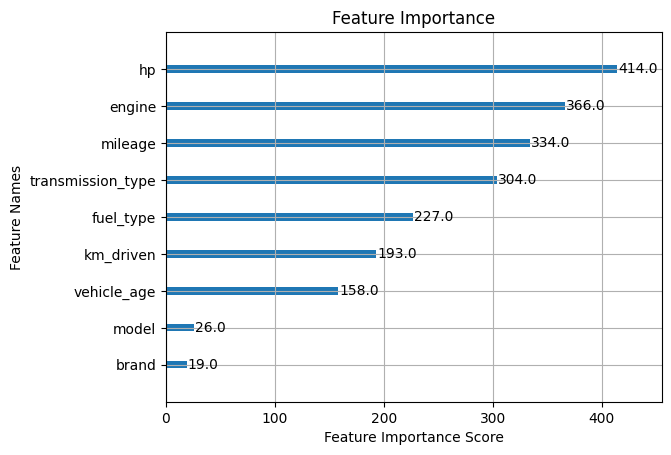

In [ ]:
# Get feature importance and feature names
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')  # You can use 'weight', 'gain', or 'cover'
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Names')

# Set y-axis tick labels as the original feature names
plt.yticks(range(len(feature_names)), feature_names)

plt.show()

Assess the proportions of upper and lower bias in the predicted values

In [ ]:
# bias distribution

y_predict = xgb_model.predict(X_test)

upper_bias_count = 0
lower_bias_count = 0

for true_val, pred_val in zip(y_test, y_predict):
    if pred_val > true_val:
        upper_bias_count += 1
    elif pred_val < true_val:
        lower_bias_count += 1

total_samples = len(y_test)
upper_bias_proportion = upper_bias_count / total_samples
lower_bias_proportion = lower_bias_count / total_samples

print("Total Predicted records: ",  total_samples)
print(f"Proportion of Upper Bias:  {upper_bias_proportion:.2f}")
print(f"Proportion of Lower Bias:  {lower_bias_proportion:.2f}")
